# Dependencies

In [12]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from time import strptime
from scipy import stats

# Load File

In [13]:
file = "monthly_data.csv"

# Read File with Pandas and Understand data

In [14]:
data = pd.read_csv(file)
data.head()

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


In [15]:
data.shape

(1001, 3)

In [16]:
data.dtypes

Account manager    object
Client Name        object
Date of Contact    object
dtype: object

# Extracting Month Names

In [17]:
data['month'] = pd.DatetimeIndex(data['Date of Contact']).month_name().str.slice(stop=3)
data.head()

,Account manager,Client Name,Date of Contact,month
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,Oct
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,Dec
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,Dec
3,Milan Crona,Armstrong Group,2013-11-02,Nov
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,Dec


# Counting Number of Contacts Per Month

In [18]:
count_month = data.groupby("month")[['Date of Contact']].count()
count_month

,Date of Contact
month,
Apr,52
Aug,79
Dec,77
Feb,64
Jan,60
Jul,66
Jun,77
Mar,58
May,69


# October is the month with most amount of contacts 

# Is October a popular month every year?

# Extracting year for each observation

In [19]:
data['year'] = pd.DatetimeIndex(data['Date of Contact']).year
data.head()

,Account manager,Client Name,Date of Contact,month,year
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,Oct,2015
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,Dec,2013
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,Dec,2013
3,Milan Crona,Armstrong Group,2013-11-02,Nov,2013
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,Dec,2013


# Count number of monthly contacts by Year

In [20]:
count_year = data.groupby(["year", "month"])[['Date of Contact']].count()
count_year

Date of Contact
year month                 
2013 Dec                 20
     Nov                 19
     Oct                 60
2014 Apr                 12
     Aug                 25
     Dec                 19
     Feb                 12
     Jan                 13
     Jul                 21
     Jun                 23
     Mar                 12
     May                 18
     Nov                 18
     Oct                 58
     Sep                 33
2015 Apr                 15
     Aug                 20
     Dec                 16
     Feb                 20
     Jan                 14
     Jul                 20
     Jun                 16
     Mar                 14
     May                 18
     Nov                 16
     Oct                 53
     Sep                 29
2016 Apr                 13
     Aug                 15
     Dec                 22
     Feb                 18
     Jan                 21
     Jul                 11
     Jun                 22
     Mar                 19
     May                 17
     Nov                 12
     Oct                 42
     Sep                 28
2017 Apr                 12
     Aug                 19
     Feb                 14
     Jan                 12
     Jul                 14
     Jun                 16
     Mar                 13
     May                 16
     Sep                 31

# Illustrate Results

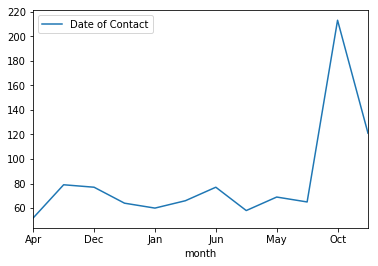

In [23]:
count_month.plot()
plt.savefig("months.png")

# Simple Plot to Show Spike in Contacts in Fall Every Year

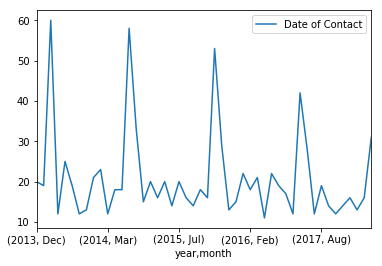

In [24]:
count_year.plot()
plt.savefig("years.png")

# October is the best month to launch
# But, has there been a downward trend over time?